<a href="https://colab.research.google.com/github/apchavezr/VISUALIZACION_DATOS_TOMA-DECISIONES/blob/main/Ejemplo_Aplicado_Visualizacion_Delitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de Delitos por Municipio en Colombia

Este notebook tiene como objetivo mostrar cómo representar diferentes tipos de datos (categóricos, numéricos, temporales y espaciales) mediante visualizaciones apropiadas en Python.

## Ejemplo aplicado
Una entidad desea analizar los tipos de delitos ocurridos entre 2020 y 2023 en tres municipios colombianos.

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

## Simulación de datos
Simularemos datos para los municipios de Inírida, Barranco Minas y Morichal, entre 2020 y 2023.

In [2]:
# Crear datos simulados
np.random.seed(123)
fechas = pd.date_range(start='2020-01-01', end='2023-12-01', freq='MS')
municipios = ['Inírida', 'Barranco Minas', 'Morichal']
delitos = ['Hurto', 'Homicidio', 'Estafa']

data = {
    'Fecha': np.tile(fechas, len(municipios) * len(delitos)),
    'Municipio': np.repeat(municipios, len(fechas) * len(delitos)),
    'Delito': np.tile(np.repeat(delitos, len(fechas)), len(municipios)),
    'Casos': np.random.poisson(lam=10, size=len(fechas)*len(municipios)*len(delitos))
}
df = pd.DataFrame(data)
df.head()

,Fecha,Municipio,Delito,Casos
0,2020-01-01,Inírida,Hurto,12
1,2020-02-01,Inírida,Hurto,7
2,2020-03-01,Inírida,Hurto,12
3,2020-04-01,Inírida,Hurto,10
4,2020-05-01,Inírida,Hurto,8


## Visualización 1: Dato categórico - Tipo de delito (gráfico de barras)

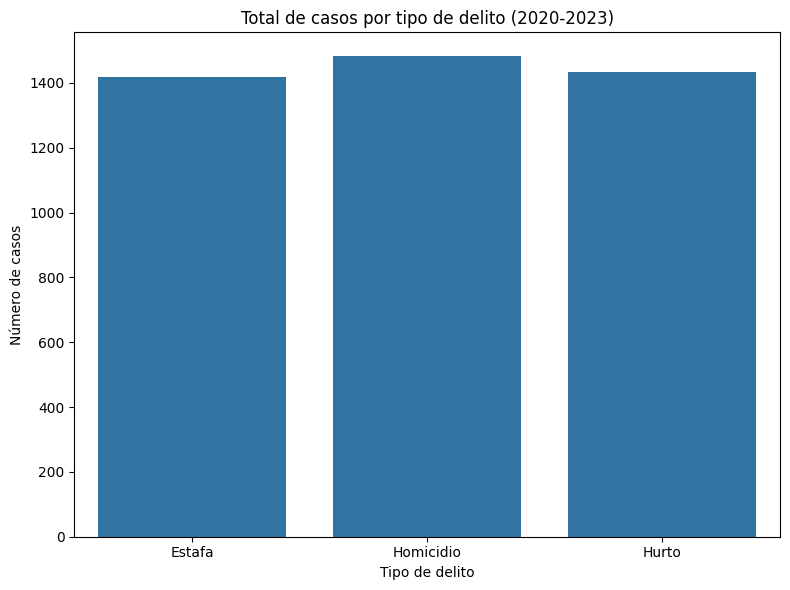

In [3]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df.groupby('Delito')['Casos'].sum().reset_index(), x='Delito', y='Casos')
plt.title('Total de casos por tipo de delito (2020-2023)')
plt.ylabel('Número de casos')
plt.xlabel('Tipo de delito')
plt.tight_layout()
plt.show()

## Visualización 2: Dato numérico - Casos por delito y municipio (barras apiladas)

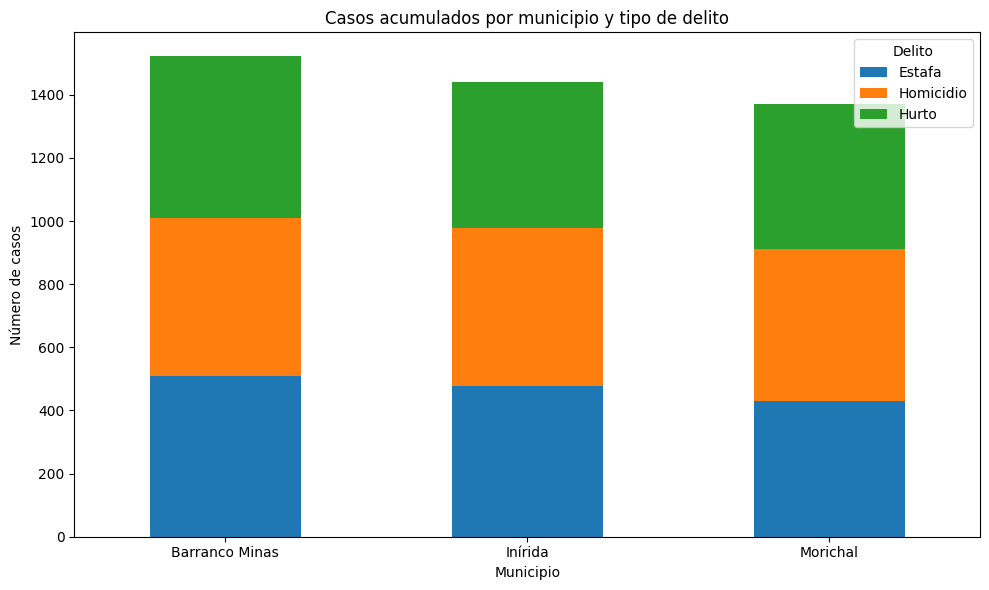

In [4]:
df_num = df.groupby(['Municipio', 'Delito'])['Casos'].sum().unstack().fillna(0)
df_num.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Casos acumulados por municipio y tipo de delito')
plt.ylabel('Número de casos')
plt.xlabel('Municipio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Visualización 3: Dato temporal - Frecuencia mensual por municipio (línea)

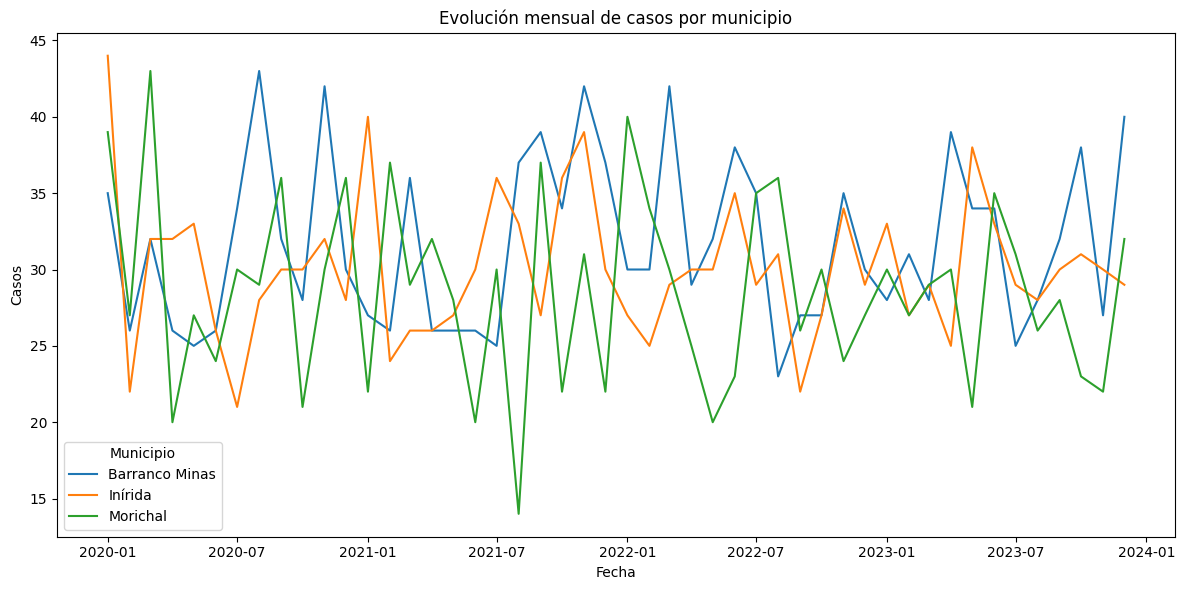

In [5]:
df_temp = df.groupby(['Fecha', 'Municipio'])['Casos'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_temp, x='Fecha', y='Casos', hue='Municipio')
plt.title('Evolución mensual de casos por municipio')
plt.ylabel('Casos')
plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

## Visualización 4: Dato espacial - Mapa coroplético (simulado con codificación ficticia)

In [6]:
# Codificar municipios (códigos simulados)
codigos = {'Inírida': 1, 'Barranco Minas': 343, 'Morichal': 883}
df_total = df.groupby('Municipio')['Casos'].sum().reset_index()
df_total['Código'] = df_total['Municipio'].map(codigos)

# Simular coordenadas (esto no es un shapefile real)
df_total['lat'] = [3.87, 2.88, 3.50]
df_total['lon'] = [-67.92, -69.61, -68.33]

fig = px.scatter_mapbox(df_total, lat='lat', lon='lon', size='Casos', hover_name='Municipio',
                        color='Casos', zoom=5, mapbox_style='carto-positron',
                        title='Distribución espacial de delitos por municipio')
fig.show()